# Heart Disease Dataset – Deliverable 1 (Data Cleaning & EDA)

**Course**: MSCS-634 – Advanced Big Data and Data Mining  
**Student**: Sandesh Pokharel  
**Deliverable**: 1 – Data Collection, Cleaning, and Exploration  
**Dataset**: UCI Heart Disease Dataset  
**Objective**:  
This notebook performs data cleaning and exploratory data analysis (EDA) on the UCI Heart Disease dataset. The goal is to prepare the dataset for predictive modeling by handling missing values, converting categorical features, and discovering patterns through visualization.

## 📄 Dataset Description & Justification

The dataset used in this project is the **UCI Heart Disease dataset**. It contains medical records of 920 patients, with features including age, sex, chest pain type, blood pressure, cholesterol level, maximum heart rate, and other key indicators.

### Why This Dataset?
- It contains both **numerical and categorical features**, ideal for preprocessing practice.
- The target variable `num` indicates presence or absence of heart disease, making it suitable for **classification modeling**.
- It has **missing values, inconsistent data**, and a mix of data types — providing a strong foundation for **data cleaning** tasks.
- It supports a wide range of future analysis including **regression, classification, clustering, and association rule mining**, which will be performed in later deliverables.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("heart_disease_uci.csv")

# Display the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
# Check basic info and summary statistics
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


## Data Cleaning

This section focuses on preparing the dataset for analysis by handling missing values, converting categorical fields, and removing inconsistencies.

### Key Steps:
- Dropped `ca` column due to excessive missing values (over 600 rows).
- Imputed missing **categorical** features (`thal`, `slope`, `fbs`, `restecg`, `exang`) using **mode**.
- Imputed missing **numerical** features (`chol`, `thalach`, `trestbps`, `oldpeak`) using **median**.
- Re-mapped `sex`, `fbs`, and `exang` from string (or mixed) to binary format.
- Converted `num` target variable to binary: `0 = No Heart Disease`, `1 = Presence of Heart Disease`.

After these operations, the dataset contains no missing values and is ready for visual analysis.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

# Display missing value count
print("Missing values per column:\n")
print(missing)

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette="rocket")
plt.title("Missing Values Per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

Missing values per column:

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64


/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/3955259693.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="rocket")


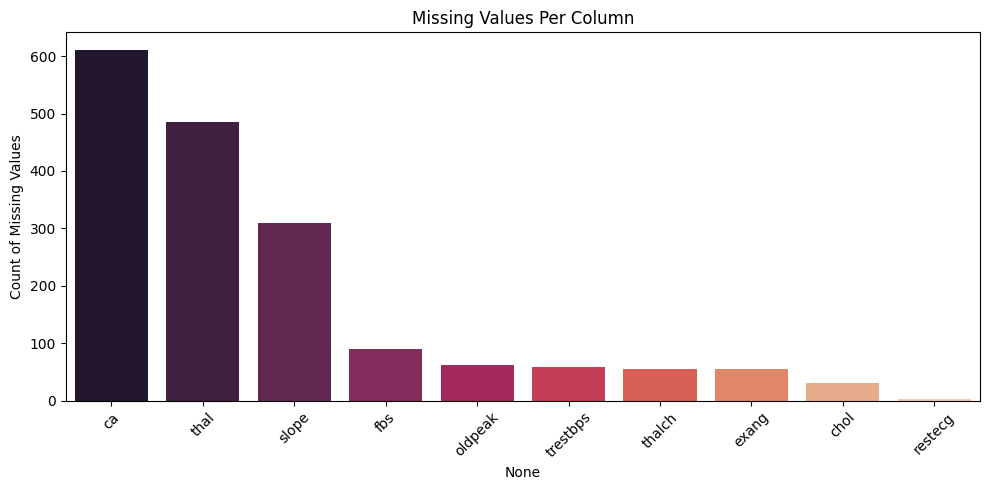

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

# Display missing value count
print("Missing values per column:\n")
print(missing)

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette="rocket")
plt.title("Missing Values Per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧹 Data Cleaning & Preprocessing

This section involves cleaning and preparing the raw dataset by converting string-based columns to numeric, dropping problematic features, and filling in missing data.

---

### 🔄 Boolean & Categorical Conversion

To ensure compatibility with machine learning models, we first convert several categorical and boolean-like columns into binary numeric values:

- `fbs` (Fasting Blood Sugar) and `exang` (Exercise-Induced Angina) are originally stored as `'True'` and `'False'`. These are converted to `1` and `0`, respectively.
- `sex` is also mapped to binary: `'Male' = 1`, `'Female' = 0`.

This step ensures all these features are in numeric format suitable for analysis and modeling.

---

### 🗑️ Dropping Columns with Excessive Missing Values

We drop the `ca` column because it has **too many missing values**. Including such a feature can introduce bias and reduce the performance of our models, so it's better to eliminate it altogether.

---

### 🧠 Handling Missing Values

We use different strategies to impute missing data depending on the column type:

- **Categorical Features:**  
  For columns like `thal`, `slope`, `fbs`, `exang`, and `restecg`, we fill missing values using the **mode** (most frequent value). This helps preserve the most common category while filling in gaps.

- **Numerical Features:**  
  For columns such as `oldpeak`, `trestbps`, `thalch`, and `chol`, we use the **median** to impute missing values. The median is a robust statistic that avoids skewing the data due to outliers.

---

### Final Sanity Check

After the imputations, we run a quick check to ensure that there are **no missing values left** in the dataset.

```python
print("Any missing values left?", df.isnull().sum().any())
```

In [6]:
# Convert boolean-like columns to actual booleans or binary integers
df['fbs'] = df['fbs'].astype(str).map({'True': 1, 'False': 0})
df['exang'] = df['exang'].astype(str).map({'True': 1, 'False': 0})

# Convert 'sex' to binary (Male = 1, Female = 0)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [7]:
# Drop 'ca' column due to too many missing values
df.drop(columns=['ca'], inplace=True)

# Impute categorical columns with mode
categorical_cols = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns with median
numerical_cols = ['oldpeak', 'trestbps', 'thalch', 'chol']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm all missing values handled
print("Any missing values left?", df.isnull().sum().any())

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/2223433738.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


KeyError: 0

In [8]:
# Drop 'ca' column due to too many missing values
df.drop(columns=['ca'], inplace=True)

# Impute categorical columns with mode
categorical_cols = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns with median (corrected 'thalach' spelling)
numerical_cols = ['oldpeak', 'trestbps', 'thalach', 'chol']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm all missing values handled
print("Any missing values left?", df.isnull().sum().any())

KeyError: "['ca'] not found in axis"

In [9]:
# Drop 'ca' column due to too many missing values

# Impute categorical columns with mode
categorical_cols = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns with median (corrected 'thalach' spelling)
numerical_cols = ['oldpeak', 'trestbps', 'thalach', 'chol']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm all missing values handled
print("Any missing values left?", df.isnull().sum().any())

KeyError: 0

In [10]:
# Get list of remaining missing columns
missing_cols = df.columns[df.isnull().any()]

# Separate by data type
categorical_cols = [col for col in missing_cols if df[col].dtype == "object"]
numerical_cols = [col for col in missing_cols if df[col].dtype != "object"]

# Impute categorical with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

# Impute numeric with median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Final check
print("Any missing values left?", df.isnull().sum().any())

Any missing values left? True


/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/936261533.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode().iloc[0], inplace=True)
/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/936261533.py:14: FutureWarn

## Safe Imputation of Missing Values (Flexible Method)

In this section, we perform a generalized and safe imputation of missing values by dynamically detecting column types.

---

### Identify Columns with Missing Data

We first identify which columns contain missing values using:

```python
missing_cols = df.columns[df.isnull().any()]
```

Then we categorize them into:
- **Categorical columns** (`dtype == object`)
- **Numerical columns** (`dtype != object`)

This flexible detection helps in datasets where the structure may vary.

---

### Impute Missing Values by Type

- **Categorical Columns:**  
  Each column is filled using its **mode** (the most frequently occurring value), which helps preserve the most common category.

- **Numerical Columns:**  
  Each column is filled using its **median**, which is more robust than the mean, especially in the presence of outliers.

---

### Final Missing Value Check

We ensure that no missing values remain after imputation by printing a boolean check.

```python
print("Any missing values left?", df.isnull().sum().any())
```

This method is **safe, dynamic, and reusable** across datasets with mixed column types.

In [11]:
# Get list of columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Separate by type
categorical_cols = [col for col in missing_cols if df[col].dtype == "object"]
numerical_cols = [col for col in missing_cols if df[col].dtype != "object"]

# Impute categorical with mode (safe way)
for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

# Impute numeric with median (safe way)
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Final check
print("Any missing values left?", df.isnull().sum().any())

Any missing values left? True


/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/mac/Sandesh_Cumberlands_Assignments/Advanced_Big_Data_And_Data_Mining/MSCS-634-Project/venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Check for Remaining Missing Values

After performing data imputation, it's important to double-check if any missing values still exist in the dataset.

In [12]:
# Show columns with remaining missing values and their counts
df.isnull().sum()[df.isnull().sum() > 0]

sex      920
fbs      920
exang    920
dtype: int64

In [13]:
# Re-convert 'sex' column
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

# Re-convert 'fbs' column
df['fbs'] = df['fbs'].astype(str).replace({'True': 1, 'False': 0})

# Re-convert 'exang' column
df['exang'] = df['exang'].astype(str).replace({'True': 1, 'False': 0})

# Now check if anything is missing
print(df.isnull().sum()[df.isnull().sum() > 0])

sex    920
dtype: int64


In [14]:
# Fix 'sex' column — assume anything that's not 1 is 0 (since it should be binary)
df['sex'] = df['sex'].apply(lambda x: 1 if str(x).lower() == 'male' or x == 1 else 0)

# Now check again
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


## 📊 Visual Exploration of Numerical Features

This section uses various plots to explore the numeric data:

- **Histograms** help understand the distribution of each numerical feature.
- **Boxplots** reveal potential outliers that could impact model performance.
- **Correlation Heatmap** visualizes pairwise relationships between features, helping us detect multicollinearity and understand dependencies.

These plots give us valuable insights for preprocessing and feature selection in later stages.

📌 Distribution of Numeric Features


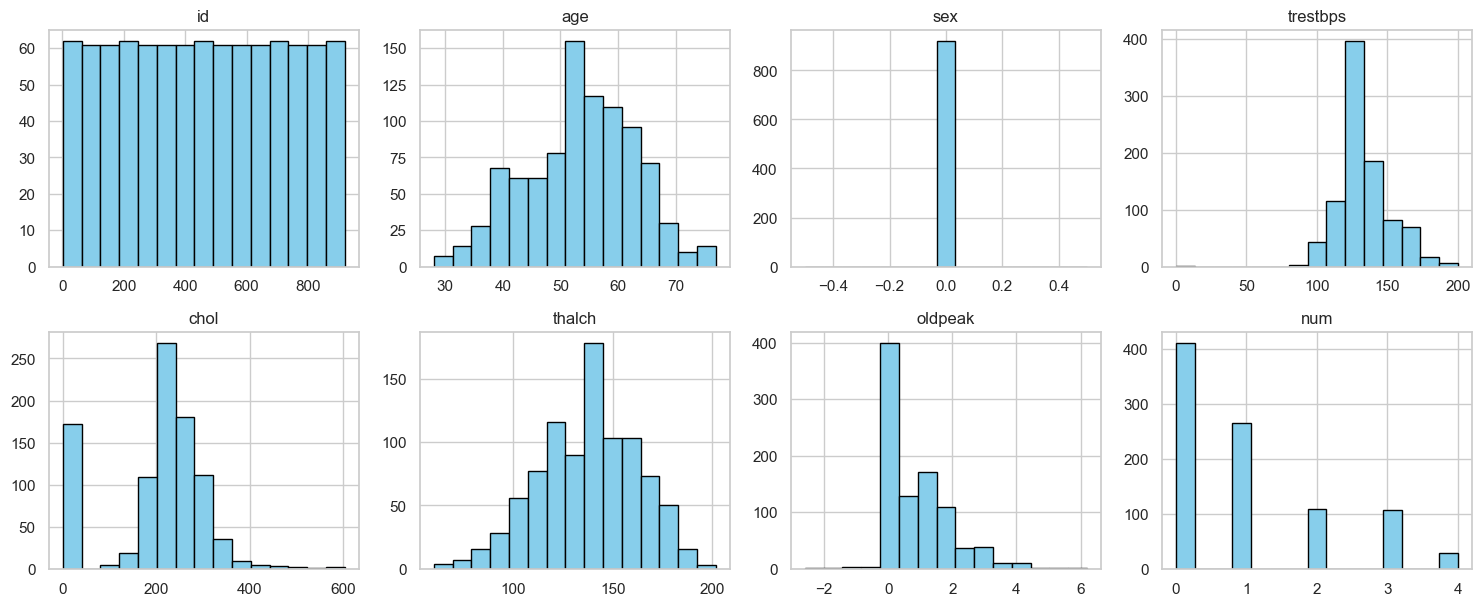

📌 Boxplots for Outlier Detection


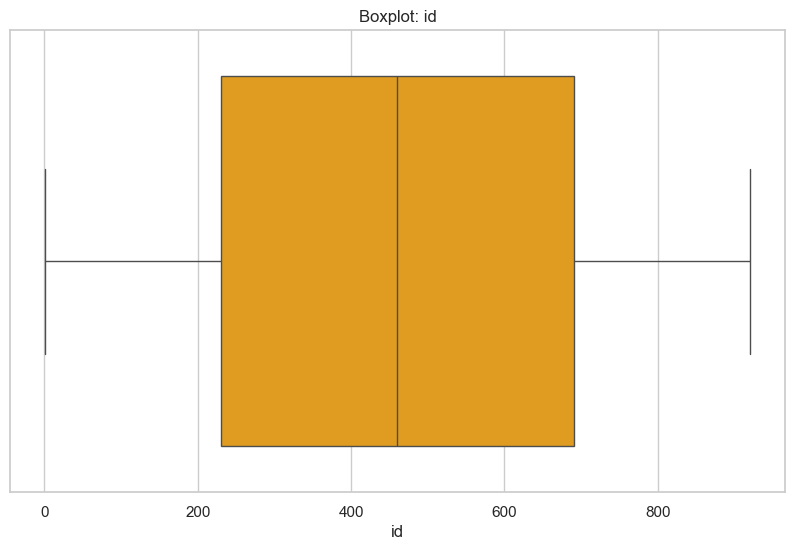

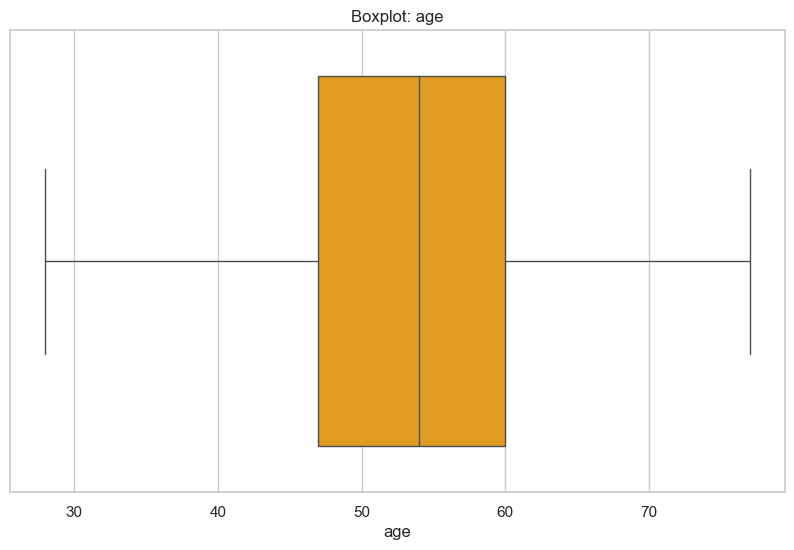

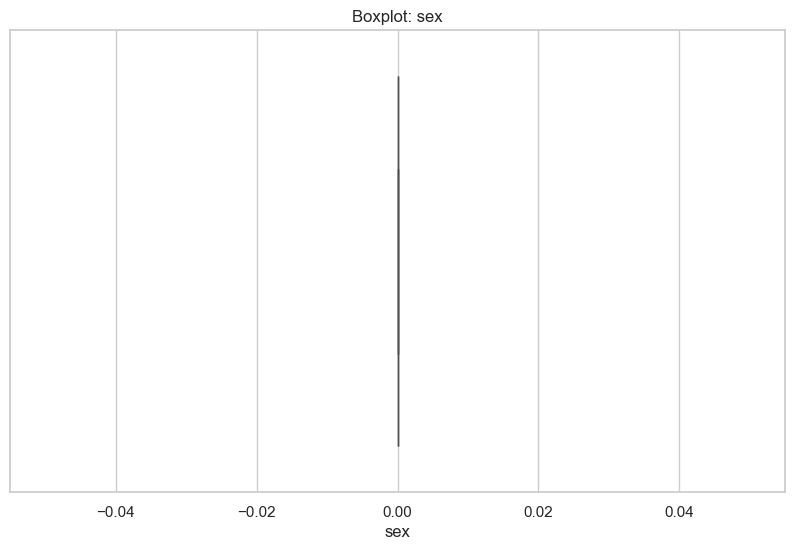

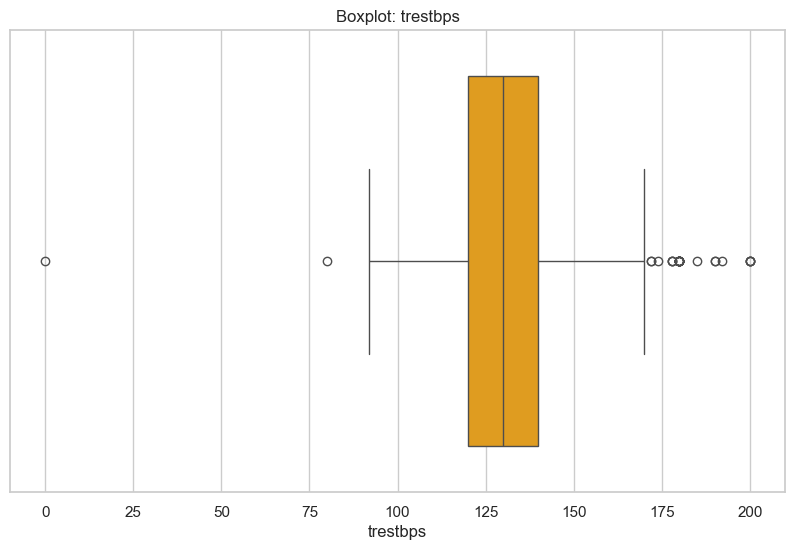

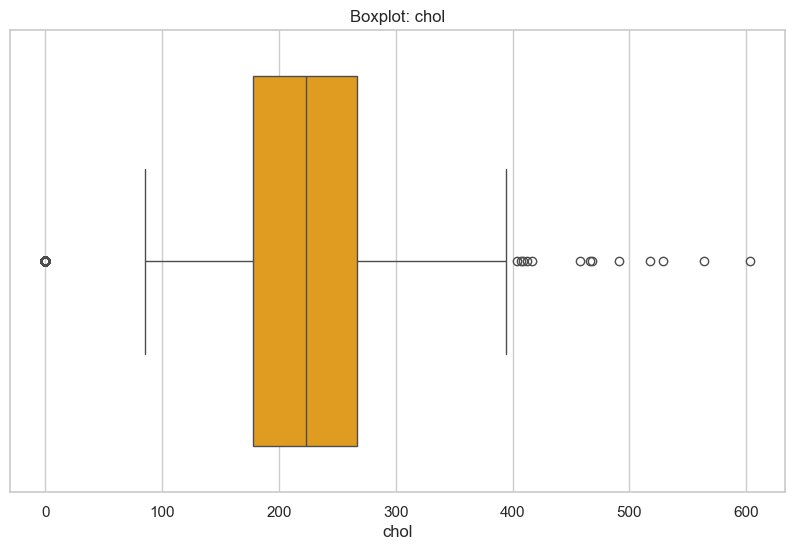

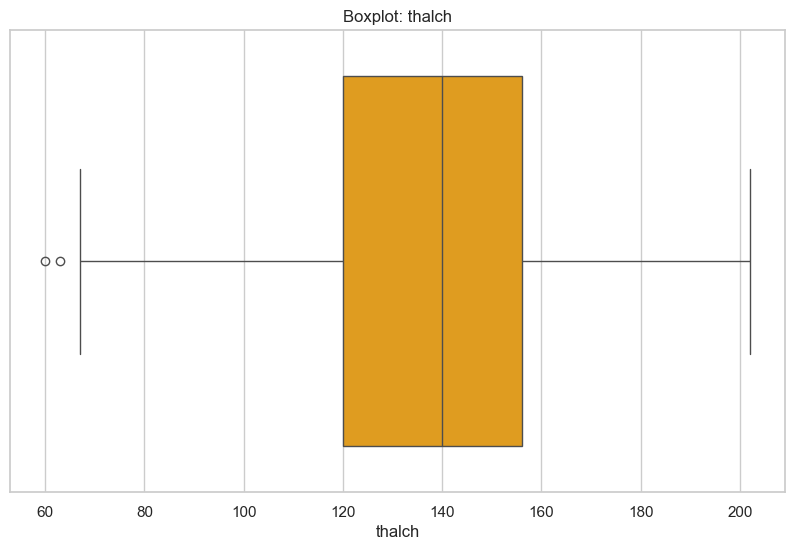

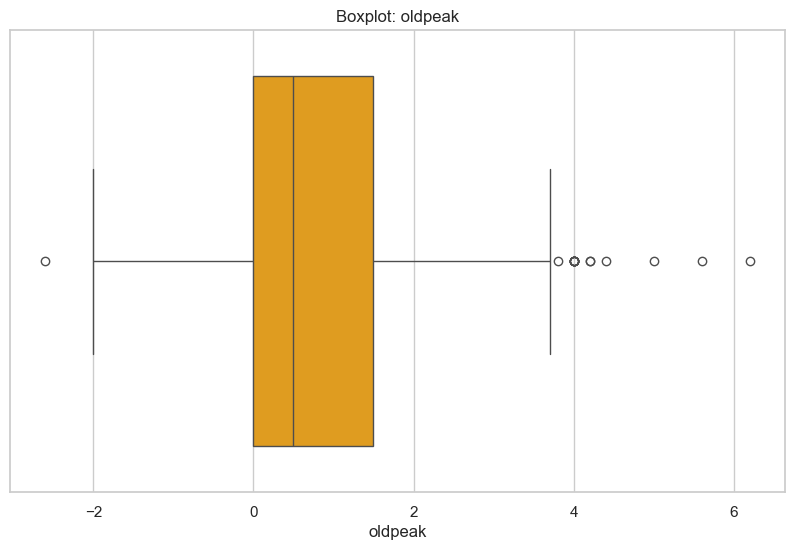

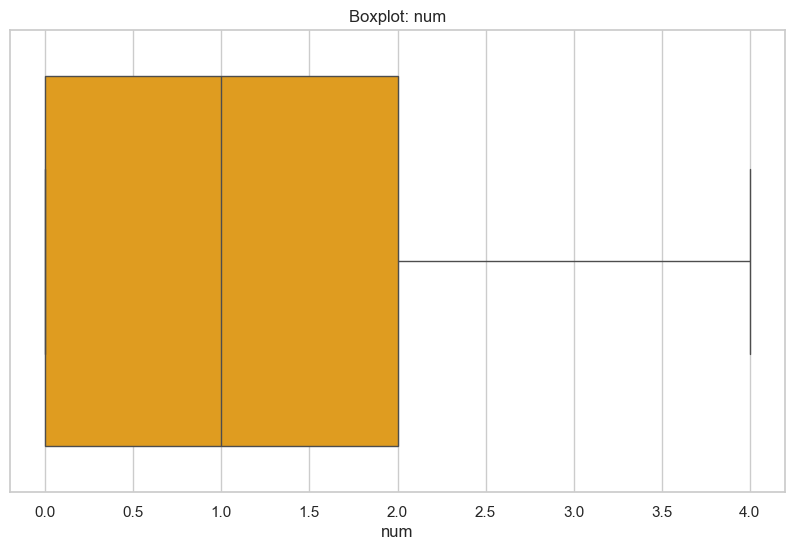

📌 Correlation Matrix


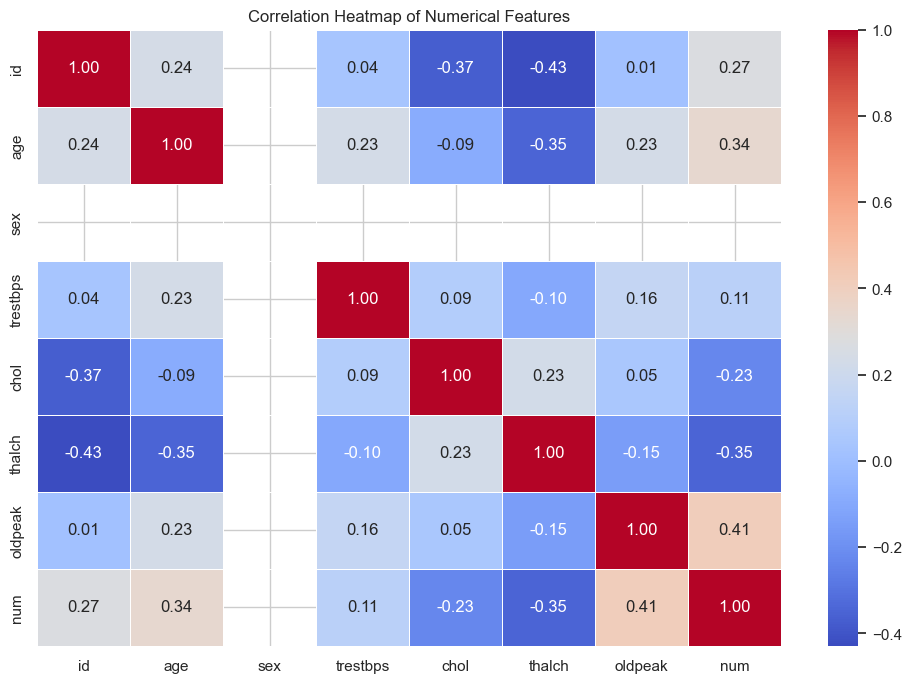

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Histogram for numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("📌 Distribution of Numeric Features")
df[numeric_cols].hist(bins=15, figsize=(15, 12), layout=(4, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# 2. Boxplots to detect outliers
print("📌 Boxplots for Outlier Detection")
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot: {col}')
    plt.show()

# 3. Correlation Heatmap
print("📌 Correlation Matrix")
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Target Variable Analysis

In this section, we explore the relationship between the target variable (`num`) and key features:

- **Countplot:** Shows the distribution of the target variable — how many patients have heart disease (`1`) vs. those who don’t (`0`).
- **Boxplot (Age vs. Heart Disease):** Helps us understand how age varies between those with and without heart disease.
- **Violin Plot (Cholesterol vs. Heart Disease):** Visualizes the distribution of cholesterol levels for each heart disease group, combining boxplot and KDE.

These insights help identify trends and patterns relevant to classification modeling.

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/3235067988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='pastel')


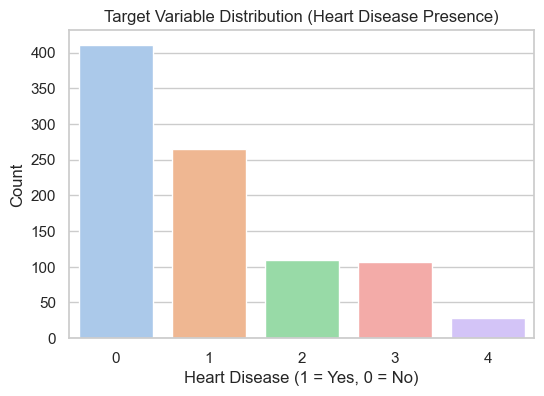

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/3235067988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='age', data=df, palette='Set2')


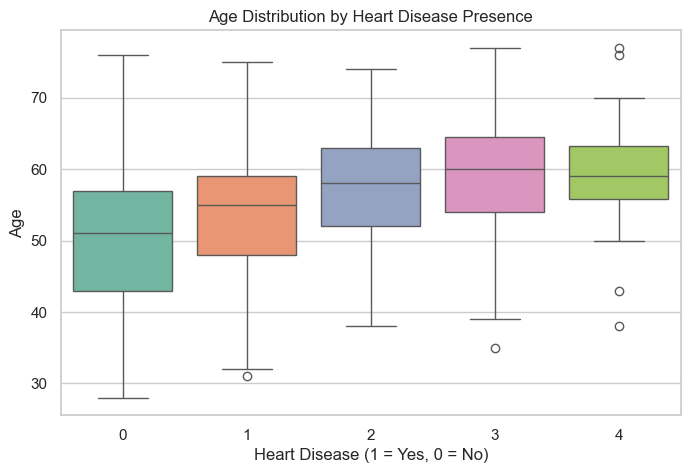

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/3235067988.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y='chol', data=df, palette='Set3')


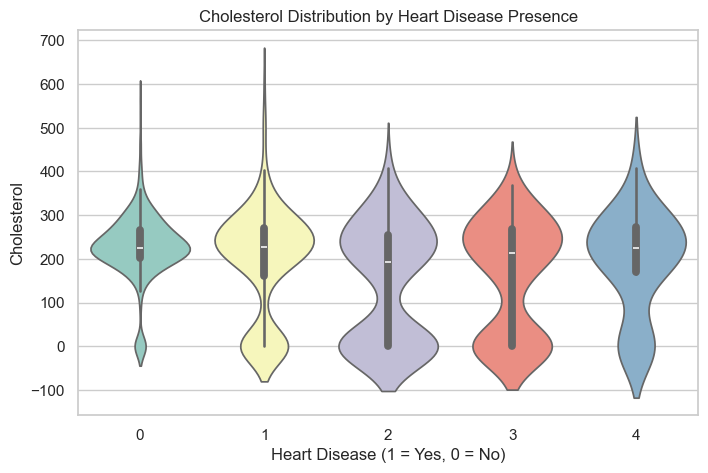

In [16]:
# 4. Countplot of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df, palette='pastel')
plt.title('Target Variable Distribution (Heart Disease Presence)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 5. Boxplot of age vs target
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

# 6. Violin plot of cholesterol by disease status
plt.figure(figsize=(8, 5))
sns.violinplot(x='num', y='chol', data=df, palette='Set3')
plt.title('Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol')
plt.show()

## Target Variable Binarization

The original target variable `num` had multiple classes indicating different levels or types of heart disease. For simplicity and to convert this into a **binary classification problem**, we map:

- All values **greater than 0 to 1** (indicating presence of heart disease)
- **0 remains 0** (indicating no heart disease)

This step ensures the target variable is suitable for binary classification models.

We then use a **countplot** to visualize the new distribution of the target variable (`num`). This helps us quickly assess **class imbalance**, if any.

In [17]:
# Convert num > 0 to 1 (i.e., any heart disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_87430/3175312295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='pastel')


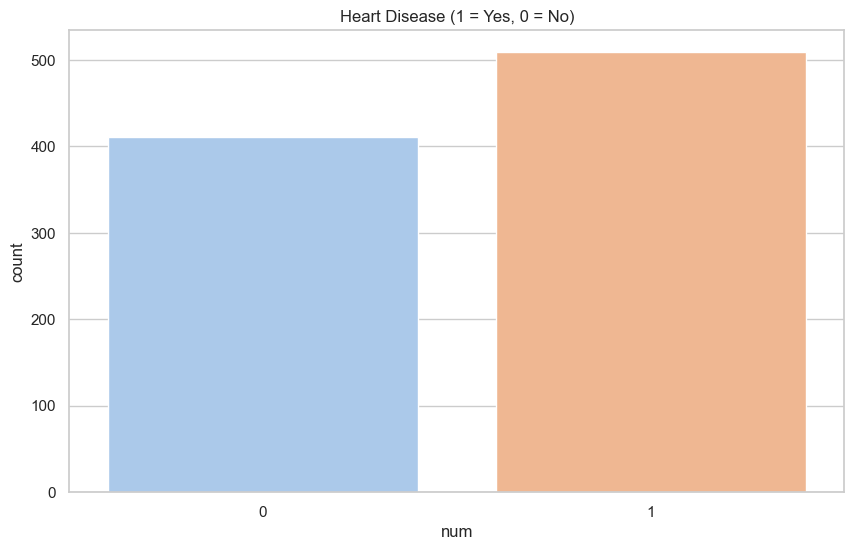

In [18]:
sns.countplot(x='num', data=df, palette='pastel')
plt.title("Heart Disease (1 = Yes, 0 = No)")
plt.show()

## Age Group Analysis

To better understand the relationship between age and heart disease, we created **age bins** by segmenting the continuous `age` variable into four labeled categories:

- **Young** (0–40)
- **Middle-Aged** (41–55)
- **Senior** (56–65)
- **Elderly** (66+)

This binning simplifies age analysis by grouping patients into meaningful life stages. We then used a **countplot with hue set to the target variable (`num`)** to visualize how heart disease prevalence differs across these age groups.

This plot helps us spot trends like whether older individuals have a higher rate of heart disease.

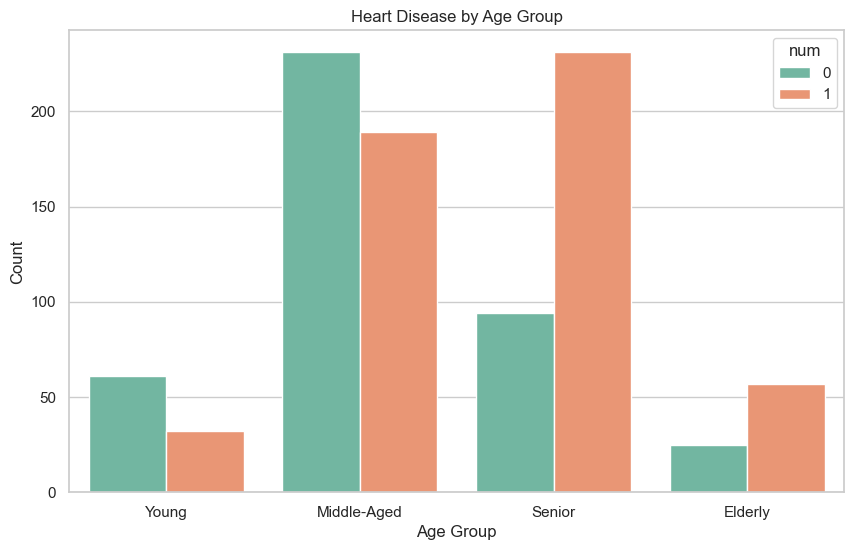

In [19]:
# Create age bins
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 40, 55, 65, 100], 
                         labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

# Check the distribution
sns.countplot(x='age_group', hue='num', data=df, palette='Set2')
plt.title("Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Categorical Feature Analysis

To explore how categorical features relate to heart disease presence, we generated **count plots** for each of the following columns:

- `sex`: Gender (Male/Female)
- `cp`: Chest pain type
- `fbs`: Fasting blood sugar level
- `restecg`: Resting ECG results
- `exang`: Exercise-induced angina
- `slope`: Slope of ST segment during exercise
- `ca`: Number of major vessels colored by fluoroscopy
- `thal`: Thalassemia type

For each feature, we plotted the distribution of patients **grouped by heart disease status (`num`)**. This helps us visually assess whether certain categories are more associated with heart disease.

For example, if a particular chest pain type has more patients with heart disease, it may be a strong predictor.

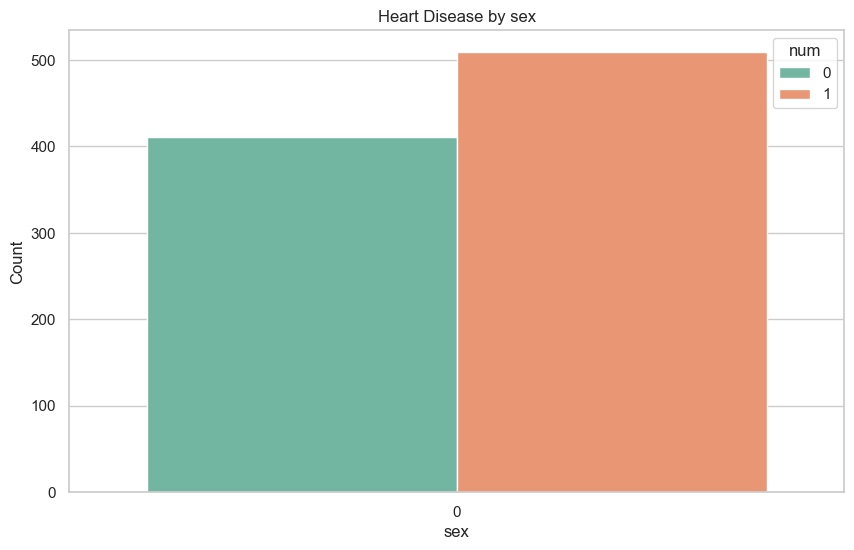

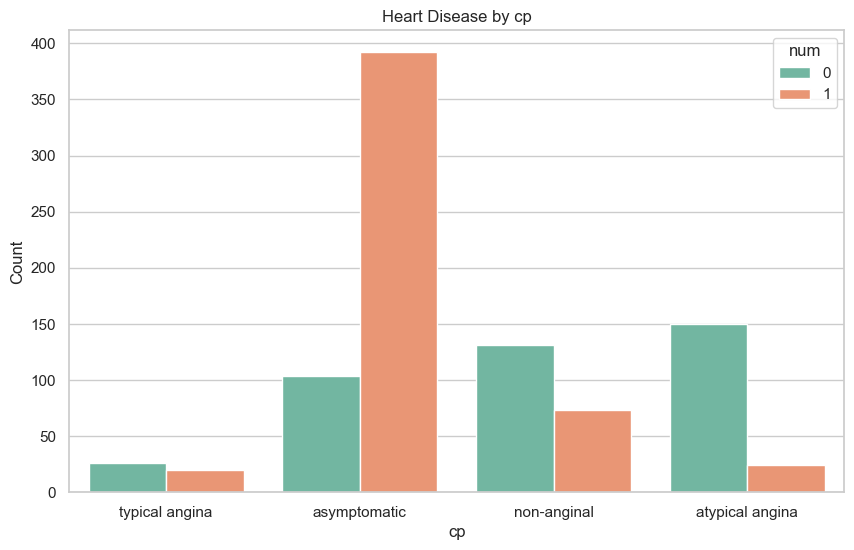

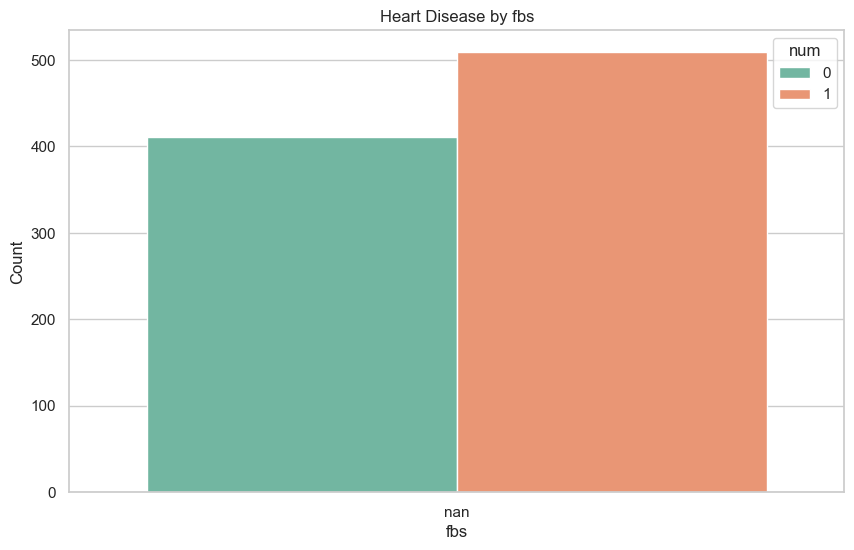

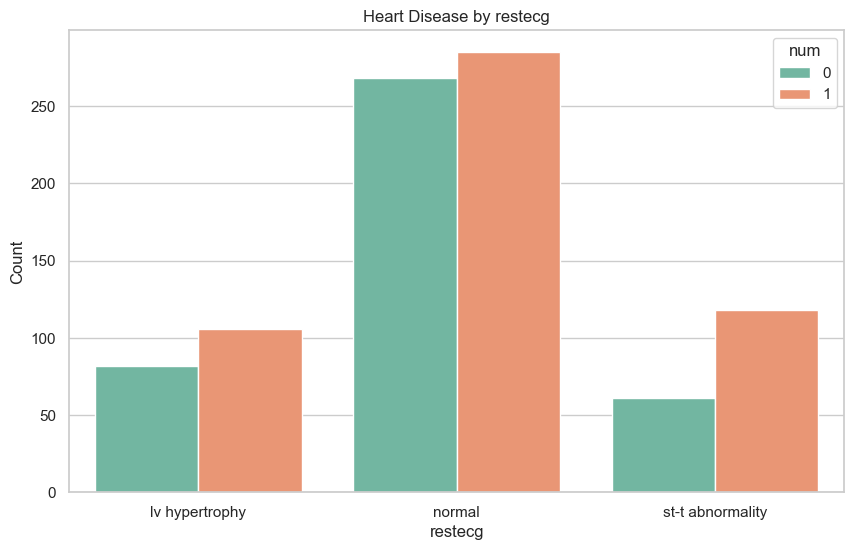

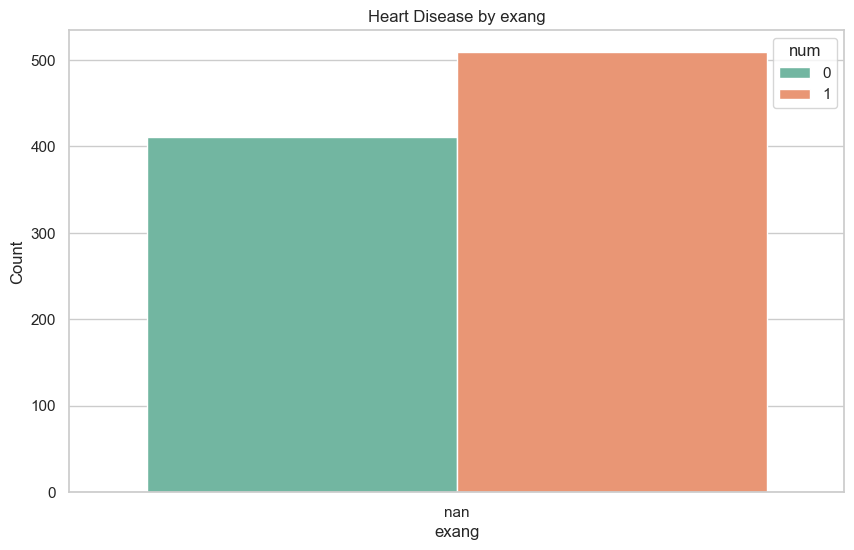

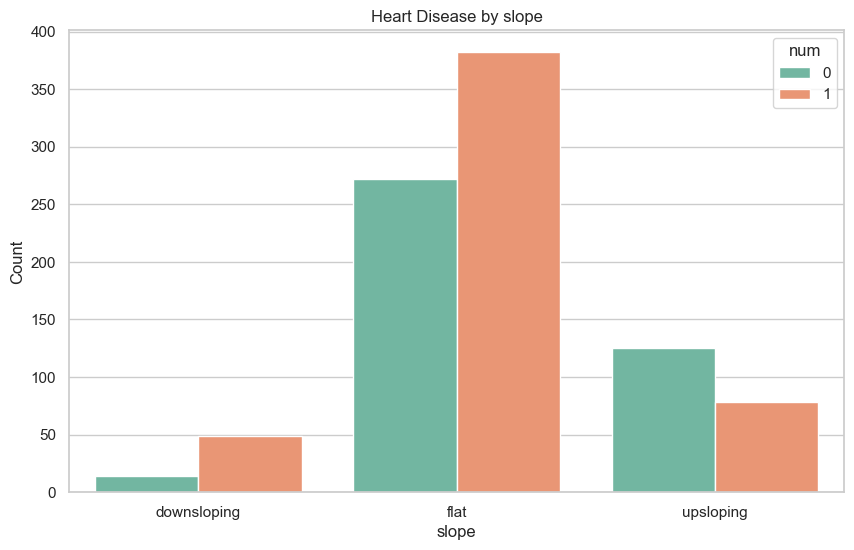

ValueError: Could not interpret value `ca` for `x`. An entry with this name does not appear in `data`.

In [20]:
# List of categorical features to explore
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create count plots for each categorical column vs 'num'
for col in categorical_cols:
    sns.countplot(x=col, hue='num', data=df, palette='Set2')
    plt.title(f"Heart Disease by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Final Correlation Matrix (Post-Preprocessing)

After cleaning and preparing the dataset, we recompute the **correlation matrix** using only relevant numerical features.

- We drop non-numeric or non-informative columns such as `id` and `age_group`.
- The heatmap visualizes **pairwise linear relationships** between features.
- Strong correlations (positive or negative) help identify redundant features or opportunities for dimensionality reduction.

This step ensures we base our modeling decisions on clean, transformed data.

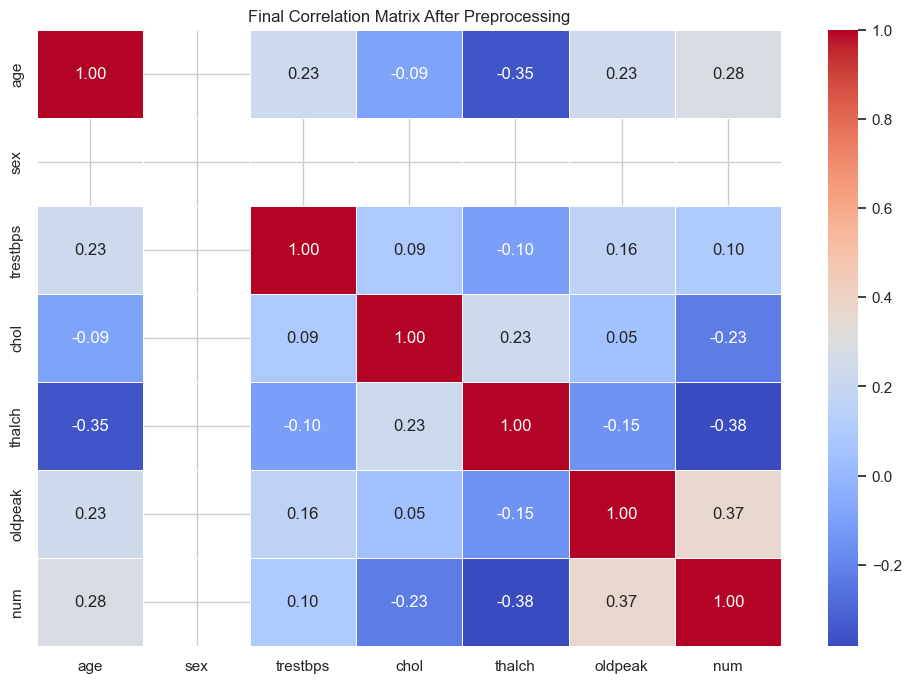

In [21]:
# Drop columns that shouldn't be in correlation (like 'id', 'age_group' which is categorical)
correlation_cols = df.drop(columns=['id', 'age_group']).select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = correlation_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Final Correlation Matrix After Preprocessing")
plt.show()